In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('../Data/train_clean.csv')
df.head()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,0,1,0,0,0
1,1,1,1,1,1,0,3,1
2,2,1,3,1,0,0,0,0
3,3,1,1,1,1,0,3,0
4,4,0,3,0,0,0,0,0


In [3]:
x_data = df.drop(['Unnamed: 0','Survived'], axis=1)
x_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [4]:
y_survived = df.Survived
y_survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_survived, test_size=0.3, random_state=42)

In [6]:
rfc_model = RandomForestClassifier(n_estimators= 100, criterion='entropy', random_state=0)
rfc_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [7]:
y_predict = rfc_model.predict(x_test)

In [8]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[140  17]
 [ 41  70]]


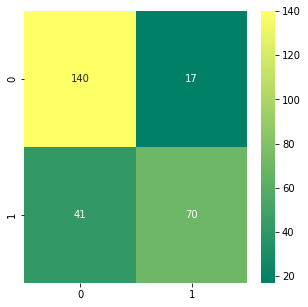

In [9]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,fmt='g', cmap='summer')
plt.show()

In [10]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       157
           1       0.80      0.63      0.71       111

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268

